**Question 1: What is a Convolutional Neural Network (CNN), and how does it differ from traditional fully connected neural networks in terms of architecture and performance on image data?**
  - Convolutional Neural Network (CNN) is a type of deep learning model designed specifically to process grid-like data, especially images.
  - It uses convolutional layers that apply small learnable filters (kernels) across an image to extract features.
  - In Cnn neurons connect only to local regions of the input whereas in traditional fully connected neural networks neuron is connected to every neuron in the previous layer.
  - Cnn shows excellent performance on image tasks whereas traditional fully connected neural networks have poor scalability to high-resolution images.

**Question 2: Discuss the architecture of LeNet-5 and explain how it laid the foundation for modern deep learning models in computer vision. Include references to its original research paper.**
  - LeNet-5 is one of the earliest and most influential CNN architectures.
  - It was introduced by Yann LeCun et al. in the late 1990s for handwritten digit recognition.
  - It demonstrated that neural networks could learn visual features directly from raw images and it laid the conceptual groundwork for modern computer vision models.

**Question 3: Compare and contrast AlexNet and VGGNet in terms of design principles, number of parameters, and performance. Highlight key innovations and limitations of each.**
  - **Design Principles:-**
    - AlexNet:-
      - It is relatively shallow by today’s standards using only 8 layers.
      - It uses large convolutional kernels.
      - It introduced ReLU activations to speed up training.
    - VGGNet:-
      - It uses much deeper neural networks more than 16 layers.
      - It uses small 3×3 convolution kernels.
      - It is a simple and uniform architecture.
  - **Number of Parameters:-**
    - AlexNet:- It uses 8 layers and nearly 60 M parameters.
    - VGG-16:- It uses 16 layers and nearly 135 M parameters.
    - VGG-19:- It uses 19 layers and nearly 144 M parameters.
  - **Performance:-**
    - VGGNet is better than AlexNet as VGGNet have about 7.5% error rate whereas AlexNet have about 15% error rate.
  - **Key Innovations:-**
    - AlexNet:-
      - It demonstrated the power of deep CNNs on large datasets.
      - It introduced ReLU and dropout as standard practices.
    - VGGNet:-
      - It showed that increasing depth improves performance.
      - It established small convolution filters as an effective design choice.
  - **Limitations:-**
    - AlexNet:-
      - Large convolution kernels are computationally inefficient.
      - Limited depth restricts feature representation capability.
    - VGGNet:-
      - Extremely memory-intensive and slow.
      - Not suitable for real-time or low-resource environments.

**Question 4: What is transfer learning in the context of image classification? Explain how it helps in reducing computational costs and improving model performance with limited data.**
  - Transfer learning is a deep learning technique in which a model trained on a large dataset is reused as the starting point for a new but related task.
  - In image classification, transfer learning typically involves using a pre-trained CNN model that has already learned rich visual features from large-scale datasets such as ImageNet.
  - Transfer learning significantly reduces training time by using pretrained models where fewer parameters need to be updated, especially when early layers are frozen.
  - This reduces hardware requirements compared to training a deep CNN from the beginning.
  - Pre-trained models already capture meaningful visual patterns which reduces the risk of overfitting when the available dataset is small.
  - It enables high accuracy even with limited labeled images.
  - And improves generalization by leveraging knowledge from large datasets.

**Question 5: Describe the role of residual connections in ResNet architecture. How do they address the vanishing gradient problem in deep CNNs?**
  - Residual connections also known as skip connections allow the input of a layer to bypass one or more layers and be added directly to the output.
  - It enable the construction of very deep networks make learning easier by allowing layers to focus on residual features.
  - In very deep networks gradients become extremely small as they propagate backward and small gradients slow down or completely stop learning in earlier layers.
  - Skip connections create direct gradient paths from later layers to earlier layers.
  - It prevents degradation of training accuracy as depth increases.

In [ ]:
# Question 6: Implement the LeNet-5 architectures using Tensorflow or PyTorch to classify the MNIST dataset. Report the accuracy and training time.
import tensorflow as tf
from tensorflow.keras import layers, models
import time

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

x_train = tf.pad(x_train, [[0,0],[2,2],[2,2],[0,0]])
x_test = tf.pad(x_test, [[0,0],[2,2],[2,2],[0,0]])

model = models.Sequential([
    layers.Input(shape=(32, 32, 1)),

    layers.Conv2D(6, kernel_size=(5,5), activation='tanh'),
    layers.AveragePooling2D(pool_size=(2,2), strides=2),

    layers.Conv2D(16, kernel_size=(5,5), activation='tanh'),
    layers.AveragePooling2D(pool_size=(2,2), strides=2),

    layers.Flatten(),
    layers.Dense(120, activation='tanh'),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

start_time = time.time()
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1)
end_time = time.time()

test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Accuracy:", test_accuracy)
print("Training Time (seconds):", end_time - start_time)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 65ms/step - accuracy: 0.8235 - loss: 0.6246
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.9569 - loss: 0.1415
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 66ms/step - accuracy: 0.9723 - loss: 0.0926
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9791 - loss: 0.0688
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9838 - loss: 0.0507
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.9875 - loss: 0.0417
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 69ms/step - accuracy: 0.9891 - loss: 0.0351
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.9922 - loss: 0.0270
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 64ms/step - accuracy: 0.9924 - loss: 0.0250
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.9944 - loss: 0.0190
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9803 - loss: 0.0641
Test Accuracy: 0.9843000173568726
Training 

In [ ]:
# Question 7: Use a pre-trained VGG16 model (via transfer learning) on a small custom dataset (e.g., flowers or animals). Replace the top layers and fine-tune the model. Include your code and result discussion.
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
import tensorflow_datasets as tfds
import time

(ds_train, ds_val), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

num_classes = ds_info.features['label'].num_classes

IMG_SIZE = 224
def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.one_hot(label, num_classes)
    return image, label

ds_train = ds_train.map(preprocess).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
ds_val = ds_val.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

start_time = time.time()
history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=1,
    verbose=1
)
end_time = time.time()

val_loss, val_accuracy = model.evaluate(ds_val)
print("Validation Accuracy:", val_accuracy)
print("Training Time (seconds):", end_time - start_time)



92/92 ━━━━━━━━━━━━━━━━━━━━ 1954s 21s/step - accuracy: 0.4442 - loss: 2.3044 - val_accuracy: 0.7425 - val_loss: 0.7028
23/23 ━━━━━━━━━━━━━━━━━━━━ 390s 17s/step - accuracy: 0.7328 - loss: 0.6973
Validation Accuracy: 0.7425068020820618
Training Time (seconds): 2004.2839286327362


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


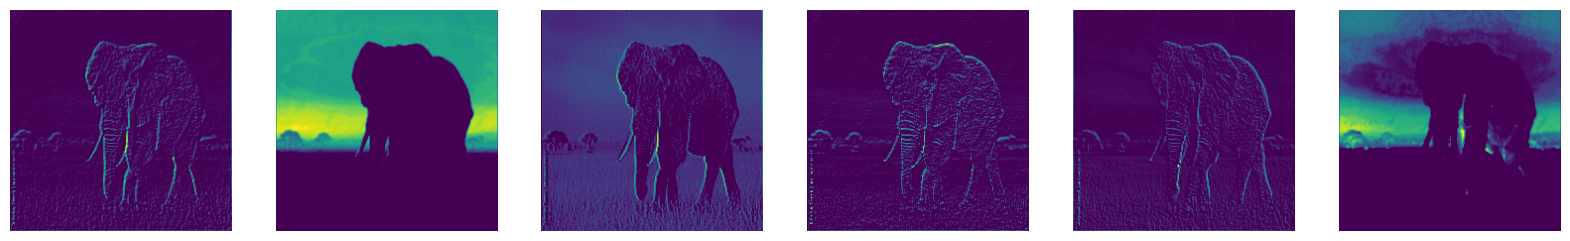

In [ ]:
# Question 8: Write a program to visualize the filters and feature maps of the first convolutional layer of AlexNet on an example input image.
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input, VGG16
from tensorflow.keras import models
import urllib.request

url = "https://as1.ftcdn.net/jpg/03/94/99/90/1000_F_394999097_2jmYoQiRNHLQa8Bs6Stq02NyBUvcLKmE.jpg"
urllib.request.urlretrieve(url, "elephant.jpg")

img = image.load_img("elephant.jpg", target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
first_conv_layer = model.layers[1]

feature_map_model = models.Model(inputs=model.input, outputs=first_conv_layer.output)
feature_maps = feature_map_model.predict(x)

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,6, figsize=(20,5))
for i in range(6):
    axes[i].imshow(feature_maps[0,:,:,i], cmap='viridis')
    axes[i].axis('off')
plt.show()



87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 548s 431ms/step - accuracy: 0.4516 - loss: 1.6037 - val_accuracy: 0.5899 - val_loss: 1.1602
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 608s 468ms/step - accuracy: 0.5886 - loss: 1.1738 - val_accuracy: 0.6001 - val_loss: 1.1150
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 526s 421ms/step - accuracy: 0.6185 - loss: 1.0917 - val_accuracy: 0.6143 - val_loss: 1.0952
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 524s 419ms/step - accuracy: 0.6417 - loss: 1.0196 - val_accuracy: 0.6095 - val_loss: 1.1116
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 525s 420ms/step - accuracy: 0.6569 - loss: 0.9722 - val_accuracy: 0.6244 - val_loss: 1.0941
Training Time (seconds): 2732.837238073349
313/313 ━━━━━━━━━━━━━━━━━━━━ 94s 300ms/step - accuracy: 0.6323 - loss: 1.0807
Test Accuracy: 0.6301000118255615


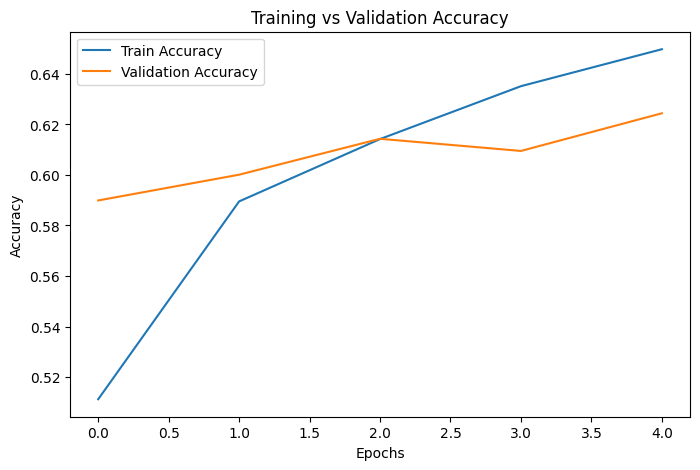

In [2]:
# Question 9: Train a GoogLeNet (Inception v1) or its variant using a standard dataset like CIFAR-10. Plot the training and validation accuracy over epochs and analyze overfitting or underfitting.

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import InceptionV3
import matplotlib.pyplot as plt
import time

IMG_SIZE = 75
BATCH_SIZE = 32
EPOCHS = 5

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

x_train_resized = tf.image.resize(x_train, (IMG_SIZE, IMG_SIZE))
x_test_resized = tf.image.resize(x_test, (IMG_SIZE, IMG_SIZE))

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

start_time = time.time()

history = model.fit(
    x_train_resized, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=32,
    verbose=1
)

end_time = time.time()
print("Training Time (seconds):", end_time - start_time)

test_loss, test_accuracy = model.evaluate(x_test_resized, y_test)
print("Test Accuracy:", test_accuracy)

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



**Question 10: You are working in a healthcare AI startup. Your team is tasked with developing a system that automatically classifies medical X-ray images into normal, pneumonia, and COVID-19. Due to limited labeled data, what approach would you suggest using among CNN architectures discussed (e.g., transfer learning with ResNet or Inception variants)? Justify your approach and outline a deployment strategy for production use.**
  - Most Sutaible option will be choosing transfer learning with ResNet.
  - Because pre-trained models are trained on large datasets and already learn generic visual features such as edges, textures, and shapes.
  - These features are highly transferable to medical images.
  - It requires significantly less labeled data compared to training from scratch.
  - ResNet uses residual or skip connections to prevent vanishing gradients.
  - It allows very deep networks without performance degradation.
  - And performs well on medical imaging tasks where subtle differences matter.
  - It is suitable for limited data due to stable training.
  - **Training Process:-**
    - Data Preparation:-
      -Resize images to match model input size.
      - Normalize pixel values.
      - Apply data augmentation.
    - Model Training:-
      - Load pre-trained ResNet without top layers.
      - Freeze early layers to retain learned features.
      - Fine-tune upper convolutional layers gradually.
    - Handling Limited Data:-
      - Use cross-validation to ensure robustness.
      - Apply regularization techniques.
    - Model Optimization:-
      - Convert trained model to TensorFlow Lite or ONNX for optimized inference.
    - Deployment:-
      - Deploy model as a REST API using FastAPI or Flask.